In [1]:
%matplotlib inline

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
dir = '/Users/signapoop/Desktop/autotune'
os.chdir(dir)
from autotune.core.HyperbandOptimiser import HyperbandOptimiser
from autotune.core.RandomOptimiser import RandomOptimiser

In [4]:
hyperband = []
random = []
n = 5
base_problem = 'cifar_5hps'
for i in range(1,n+1):

    problem_text = base_problem + "_" + str(i)
    path = '/Users/signapoop/Desktop/results/' + problem_text
    os.chdir(path)
    file = open("results.pkl",'rb')
    object_file = pickle.load(file)
    file.close()

    # Unpack file
    hyperband.append(object_file[0])
    random.append(object_file[1])

In [5]:
y = []
for opt in random:
    y = y + opt.Y

In [6]:
print(len(y))

86


In [7]:
data = np.ones((len(y),)) - np.array(y)
len_data = 64
data = data[:len_data]

In [8]:
max_power = 6
powers = [2**i for i in range(max_power+1)]  # for len(data) = 64
def boxplot(data, powers):
    def groupsOfN(y, n):
        def chunks(l, n):
            n = max(1, n)
            return [l[i:i+n] for i in range(0, len(l), n)]
        chunks = chunks(y, n)
        group_best = [max(chunk) for chunk in chunks]
        return group_best

    dataset = []
    for p in powers:
        group_best = groupsOfN(data, p)
        dataset.append(group_best)
    return dataset

In [9]:
dataset = boxplot(data, powers)

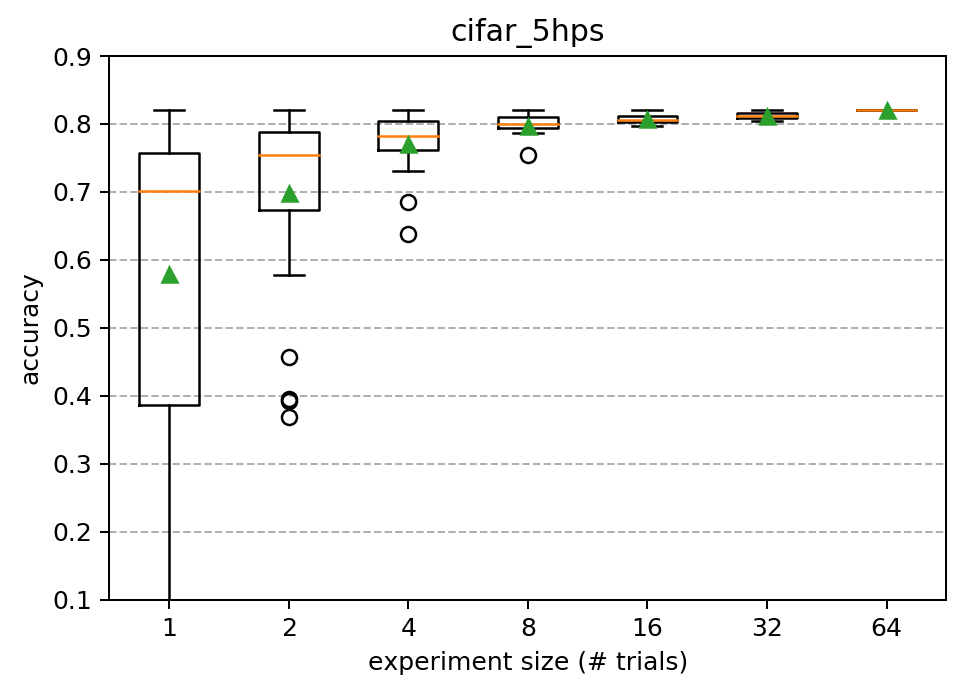

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=180)
major_ticks = np.arange(0.1, 1.0, 0.1)
ax.set_yticks(major_ticks)
ax.set_ylim(0.1,0.9)
ax.grid(axis='y', linestyle='--')
plt.boxplot(dataset, labels=powers, showmeans=True)
plt.title(base_problem)
plt.ylabel('accuracy')
plt.xlabel('experiment size (# trials)')
plt.show()